In [28]:
import pandas as pd

# Load the existing AAPL dataset instead of downloading from yfinance
google_data = pd.read_csv("AAPL.csv", parse_dates=["Date"])
google_data.set_index("Date", inplace=True)  # Set Date as index for easier analysis

# Display the first few rows
print(google_data.head())

# Check the shape of the dataset
print("Dataset Shape:", google_data.shape)


                     Adj Close              Close                High  \
Date                                                                    
NaT                       AAPL               AAPL                AAPL   
2015-05-27  29.643918991088867   33.0099983215332  33.064998626708984   
2015-05-28  29.585554122924805  32.94499969482422   32.98749923706055   
2015-05-29     29.248779296875  32.56999969482422   32.86249923706055   
2015-06-01  29.307157516479492   32.6349983215332   32.84749984741211   

                           Low                Open     Volume  
Date                                                           
NaT                       AAPL                AAPL       AAPL  
2015-05-27   32.51250076293945  32.584999084472656  183332800  
2015-05-28  32.775001525878906   32.96500015258789  122933200  
2015-05-29  32.474998474121094  32.807498931884766  203538000  
2015-06-01   32.51250076293945   32.56999969482422  128451200  
Dataset Shape: (1258, 6)


In [ ]:
# import requests
# import pandas as pd

# # Replace with your API key
# API_KEY = "LK3JL8186O3PEEED"

# def fetch_stock_data(symbol, start_date, end_date):
#     url = "https://www.alphavantage.co/query"
#     params = {
#         "function": "TIME_SERIES_DAILY_ADJUSTED",
#         "symbol": symbol,
#         "apikey": API_KEY,
#         "outputsize": "full"
#     }
    
#     response = requests.get(url, params=params)
#     data = response.json()

#     if "Time Series (Daily)" in data:
#         df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient="index")
#         df.index = pd.to_datetime(df.index)
#         df = df.loc[start_date:end_date]  # Filter by date range
#         df = df.rename(columns={
#             "1. open": "Open",
#             "2. high": "High",
#             "3. low": "Low",
#             "4. close": "Close",
#             "6. volume": "Volume"
#         })
#         df = df[["Open", "High", "Low", "Close", "Volume"]]
#         df = df.sort_index(ascending=True)  # Ensure oldest date first
#         return df
#     else:
#         print(f"❌ Error fetching stock data for {symbol}: {data}")
#         return None

# # Example Usage
# symbol = "GOOG"  # Change to any stock symbol
# start_date = "2015-01-01"
# end_date = "2024-03-09"

# df = fetch_stock_data(symbol, start_date, end_date)

# if df is not None:
#     print(df.head())  # Display first few rows


In [30]:
google_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
NaT,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
2015-05-27,29.643918991088867,33.0099983215332,33.064998626708984,32.51250076293945,32.584999084472656,183332800
2015-05-28,29.585554122924805,32.94499969482422,32.98749923706055,32.775001525878906,32.96500015258789,122933200
2015-05-29,29.248779296875,32.56999969482422,32.86249923706055,32.474998474121094,32.807498931884766,203538000
2015-06-01,29.307157516479492,32.6349983215332,32.84749984741211,32.51250076293945,32.56999969482422,128451200


In [31]:
google_data.shape

(1258, 6)

In [32]:
google_data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1258,1258,1258,1258,1258,1258
unique,1240,1200,1190,1203,1201,1254
top,33.405494689941406,43.125,29.360000610351562,24.209999084472656,24.0,150347200
freq,2,3,3,2,3,2


In [33]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, NaT to 2020-05-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Adj Close  1258 non-null   object
 1   Close      1258 non-null   object
 2   High       1258 non-null   object
 3   Low        1258 non-null   object
 4   Open       1258 non-null   object
 5   Volume     1258 non-null   object
dtypes: object(6)
memory usage: 68.8+ KB


In [34]:
google_data.isna().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Bishal\AppData\Local\Temp\ipykernel_25416\562190722.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  google_data["Adj Close"].fillna(method="ffill", inplace=True)
C:\Users\Bishal\AppData\Local\Temp\ipykernel_25416\562190722.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  google_data["Adj Close"].fillna(method="ffill", inplace=True)


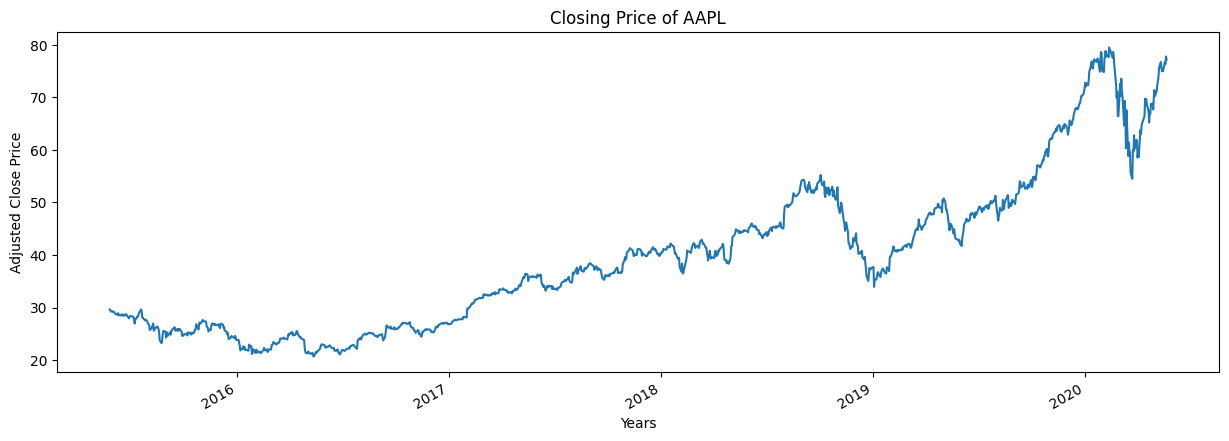

In [36]:
import matplotlib.pyplot as plt

# Check for missing values
google_data["Adj Close"] = pd.to_numeric(google_data["Adj Close"], errors="coerce")
google_data["Adj Close"].fillna(method="ffill", inplace=True)

# Plot adjusted closing price
plt.figure(figsize=(15, 5))
google_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adjusted Close Price")
plt.title("Closing Price of AAPL")
plt.show()


In [37]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [38]:
google_data.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

C:\Users\Bishal\AppData\Local\Temp\ipykernel_25416\1374369436.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  values.fillna(method="ffill", inplace=True)


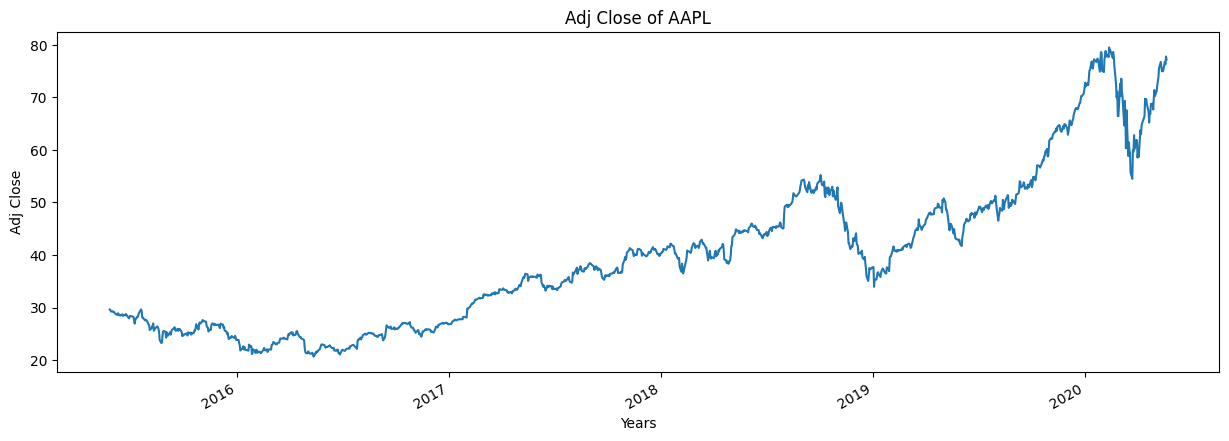

Skipping non-numeric column: Close
Skipping non-numeric column: High
Skipping non-numeric column: Low
Skipping non-numeric column: Open
Skipping non-numeric column: Volume


In [39]:
def plot_graph(figsize, values, column_name):
    plt.figure(figsize=figsize)

    # Convert column to numeric if needed
    values = pd.to_numeric(values, errors="coerce")

    # Fill NaN values if any
    values.fillna(method="ffill", inplace=True)

    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of AAPL")
    plt.show()

for column in google_data.columns:
    if google_data[column].dtype in ["int64", "float64"]:
        plot_graph((15,5), google_data[column], column)
    else:
        print(f"Skipping non-numeric column: {column}")


In [40]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [41]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [42]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [43]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [44]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 0
2013 0
2014 0
2015 153
2016 252
2017 251
2018 251
2019 252
2020 98
2021 0
2022 0
2023 0
2024 0


In [45]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [46]:
google_data['MA_for_250_days'][0:250].tail()

Date
2016-05-13   NaN
2016-05-16   NaN
2016-05-17   NaN
2016-05-18   NaN
2016-05-19   NaN
Name: MA_for_250_days, dtype: float64

C:\Users\Bishal\AppData\Local\Temp\ipykernel_25416\1374369436.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  values.fillna(method="ffill", inplace=True)


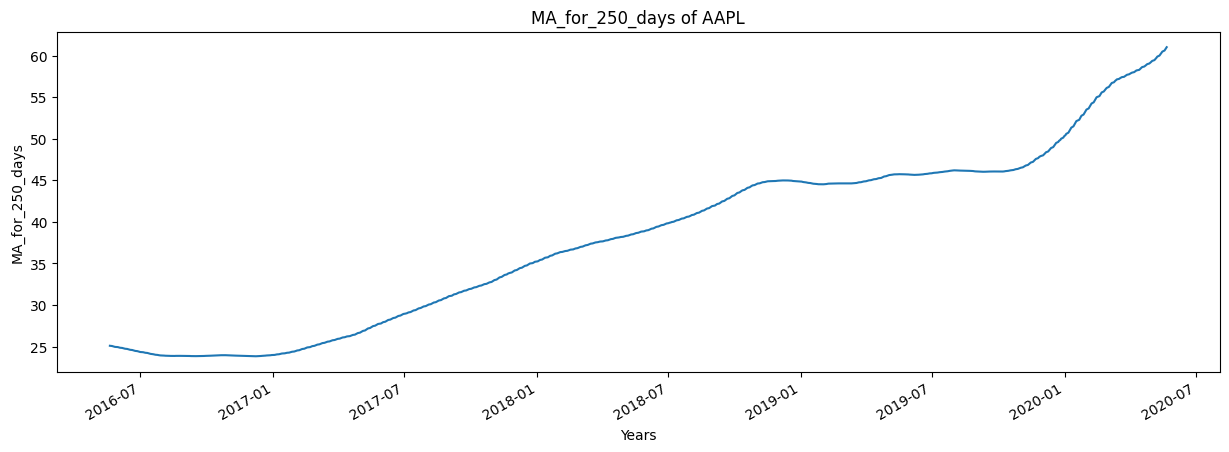

In [47]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

In [49]:
import matplotlib.pyplot as plt

def plot_graph(figsize, values, column_name):
    plt.figure(figsize=figsize)

    # If multiple columns are passed, loop through each column
    if isinstance(values, pd.DataFrame):  
        for col in values.columns:
            values[col] = pd.to_numeric(values[col], errors="coerce")  # Convert to numeric
            values[col].fillna(method="ffill", inplace=True)  # Fill missing values
            plt.plot(values[col], label=col)  # Plot each column separately
    else:
        values = pd.to_numeric(values, errors="coerce")
        values.fillna(method="ffill", inplace=True)
        plt.plot(values, label=column_name)  

    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} Over Time")
    plt.legend()
    plt.show()


C:\Users\Bishal\AppData\Local\Temp\ipykernel_25416\1285786437.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[col] = pd.to_numeric(values[col], errors="coerce")  # Convert to numeric
C:\Users\Bishal\AppData\Local\Temp\ipykernel_25416\1285786437.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the 

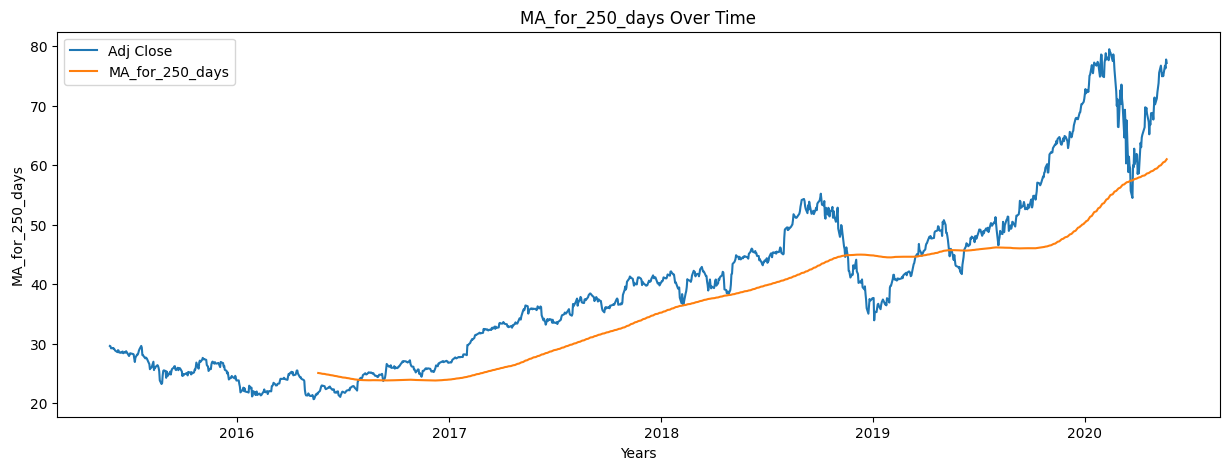

In [50]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')


C:\Users\Bishal\AppData\Local\Temp\ipykernel_25416\1285786437.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[col] = pd.to_numeric(values[col], errors="coerce")  # Convert to numeric
C:\Users\Bishal\AppData\Local\Temp\ipykernel_25416\1285786437.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the 

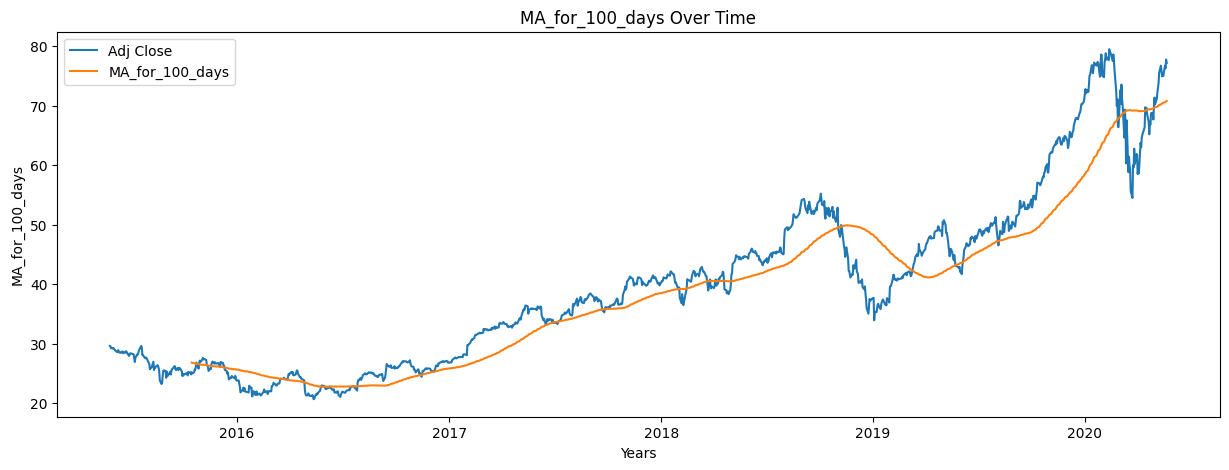

In [51]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

C:\Users\Bishal\AppData\Local\Temp\ipykernel_25416\1285786437.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[col] = pd.to_numeric(values[col], errors="coerce")  # Convert to numeric
C:\Users\Bishal\AppData\Local\Temp\ipykernel_25416\1285786437.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the 

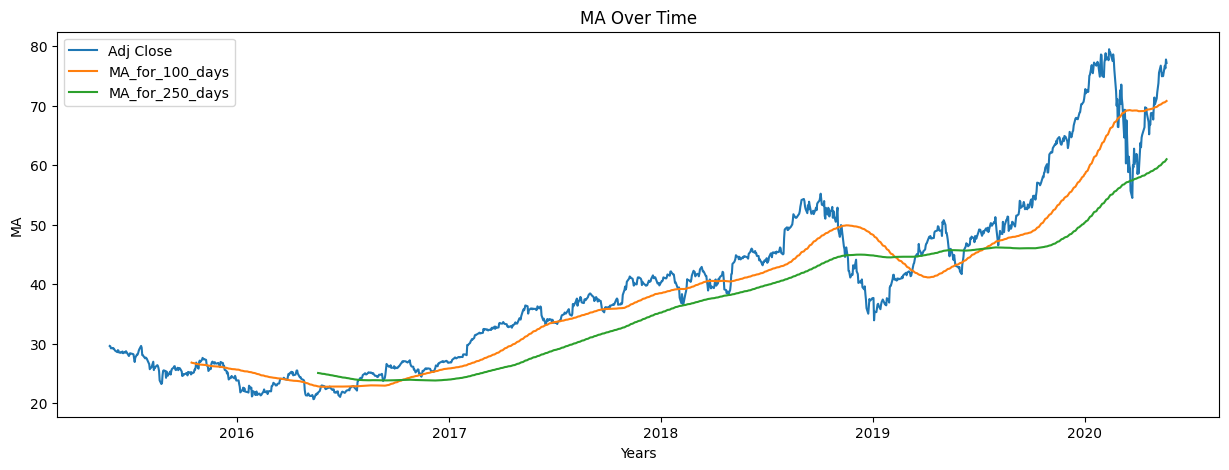

In [52]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [54]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
NaT,NaN,NaN
2015-05-27,29.643919,NaN
2015-05-28,29.585554,-0.001969
2015-05-29,29.248779,-0.011383
2015-06-01,29.307158,0.001996


C:\Users\Bishal\AppData\Local\Temp\ipykernel_25416\1285786437.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  values.fillna(method="ffill", inplace=True)


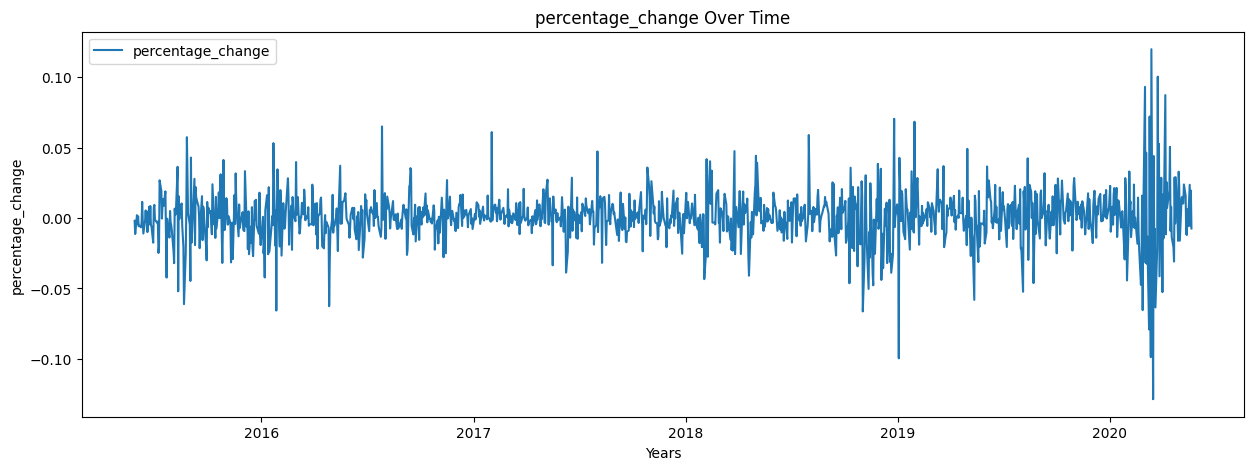

In [55]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [56]:
Adj_close_price = google_data[['Adj Close']]

In [57]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([nan]), array([nan]))

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[       nan],
       [0.1521679 ],
       [0.15117521],
       ...,
       [0.94540513],
       [0.97063777],
       [0.96077639]])

In [59]:
len(scaled_data)

1258

In [60]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [61]:
x_data[0],y_data[0]

(array([[       nan],
        [0.1521679 ],
        [0.15117521],
        [0.14544722],
        [0.14644014],
        [0.14422543],
        [0.1448363 ],
        [0.14193433],
        [0.13922315],
        [0.13597747],
        [0.13452642],
        [0.14010149],
        [0.13899395],
        [0.13357182],
        [0.13261705],
        [0.13521375],
        [0.13406816],
        [0.1362829 ],
        [0.1313952 ],
        [0.13525196],
        [0.1330371 ],
        [0.13716114],
        [0.13483189],
        [0.13196804],
        [0.12349098],
        [0.12692757],
        [0.1313952 ],
        [0.13078424],
        [0.12910422],
        [0.12792042],
        [0.11600661],
        [0.10646043],
        [0.11871789],
        [0.12780584],
        [0.12761493],
        [0.13223532],
        [0.13868856],
        [0.14292702],
        [0.15228248],
        [0.14724208],
        [0.12612576],
        [0.12589667],
        [0.12337633],
        [0.1167704 ],
        [0.11909982],
        [0

In [62]:

int(len(x_data)*0.7)

810

In [63]:
4908-100-int(len(x_data)*0.7)

3998

In [64]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [65]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(810, 100, 1)
(810, 1)
(348, 100, 1)
(348, 1)


In [66]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [67]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\Bishal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [69]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
810/810 ━━━━━━━━━━━━━━━━━━━━ 51s 57ms/step - loss: nan
Epoch 2/2
810/810 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: nan


In [71]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [74]:
predictions = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [73]:
predictions

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [75]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [76]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[35.40195465],
       [35.32315826],
       [35.996521  ],
       [36.60780716],
       [36.72481537],
       [36.36424637],
       [35.8174324 ],
       [36.55048752],
       [36.99701691],
       [37.21669388],
       [37.44594574],
       [36.60542297],
       [36.75346756],
       [36.46215057],
       [37.6703949 ],
       [37.32178116],
       [36.93493271],
       [39.45886993],
       [39.74303055],
       [39.76213455],
       [40.89157486],
       [41.59120178],
       [41.60553741],
       [40.81754684],
       [40.86552048],
       [40.63050079],
       [40.98062515],
       [40.81035614],
       [40.95904541],
       [40.86790848],
       [40.99020767],
       [41.25398254],
       [41.02137756],
       [41.47941208],
       [41.78157425],
       [41.80555344],
       [41.93504715],
       [41.52258301],
       [41.95902634],
       [42.1700592 ],
       [42.09331512],
       [41.85112   ],
       [41.36670303],
       [41.46503448],
       [42.90147781],
       [43

In [77]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [78]:
rmse

np.float64(nan)

In [79]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-01-04,35.401955,NaN
2019-01-07,35.323158,NaN
2019-01-08,35.996521,NaN
2019-01-09,36.607807,NaN
2019-01-10,36.724815,NaN


C:\Users\Bishal\AppData\Local\Temp\ipykernel_25416\1285786437.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  values[col].fillna(method="ffill", inplace=True)  # Fill missing values
C:\Users\Bishal\AppData\Local\Temp\ipykernel_25416\1285786437.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  values[col].fillna(method="ffill", inplace=True)  # Fill missing values


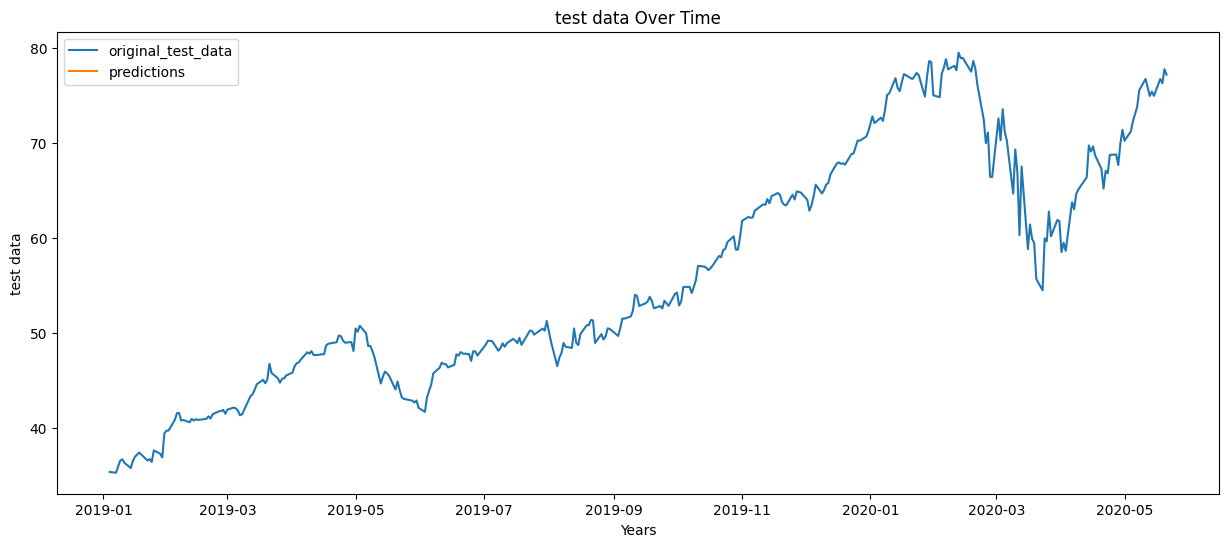

In [80]:
plot_graph((15,6), ploting_data, 'test data')

C:\Users\Bishal\AppData\Local\Temp\ipykernel_25416\1285786437.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  values[col].fillna(method="ffill", inplace=True)  # Fill missing values
C:\Users\Bishal\AppData\Local\Temp\ipykernel_25416\1285786437.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  values[col].fillna(method="ffill", inplace=True)  # Fill missing values


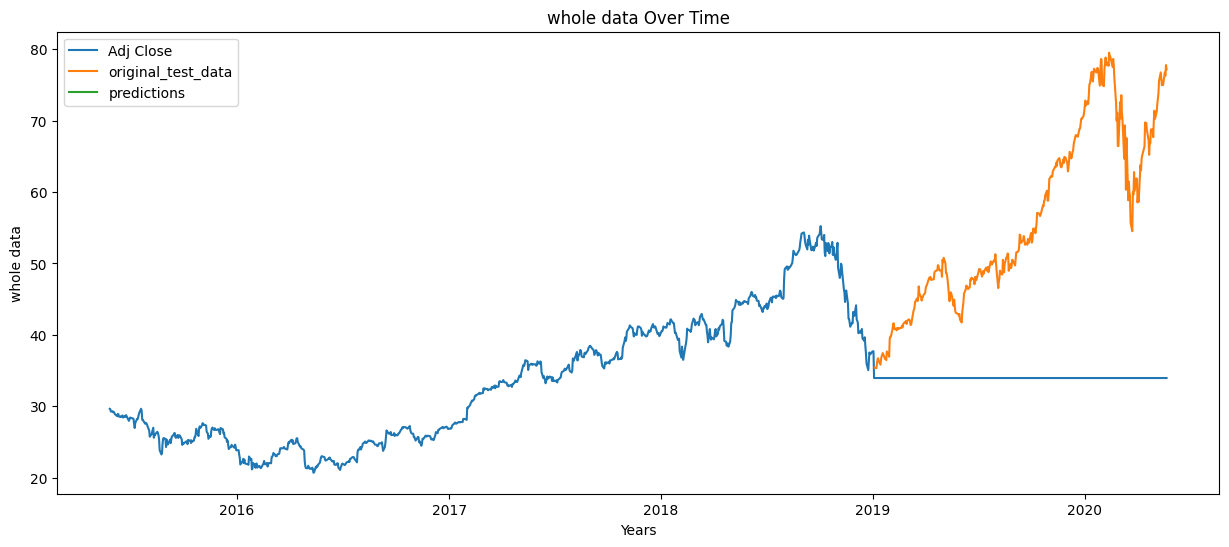

In [81]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [84]:
model.save("Latest_stock_price_model.keras")

In [87]:
import tensorflow as tf

MODEL_PATH = "C:/Users/Bishal/Desktop/Final Project/StockSanket/stocks/data/Latest_stock_price_model.keras"

# Load the model from the correct directory
model = tf.keras.models.load_model(MODEL_PATH)

print("✅ Model loaded successfully!")


✅ Model loaded successfully!
